# **Car price prediction**
This notebook analyse car prices of different makers and models with different features and also help users predict car price using the already fuelled data to learn from your new data using the features made available on the web to help determine and predict your car price. In otherwords, before the dataset was used for prediction thorough data cleaning and exploration was carried out inorder to achieve a statistical significant result.
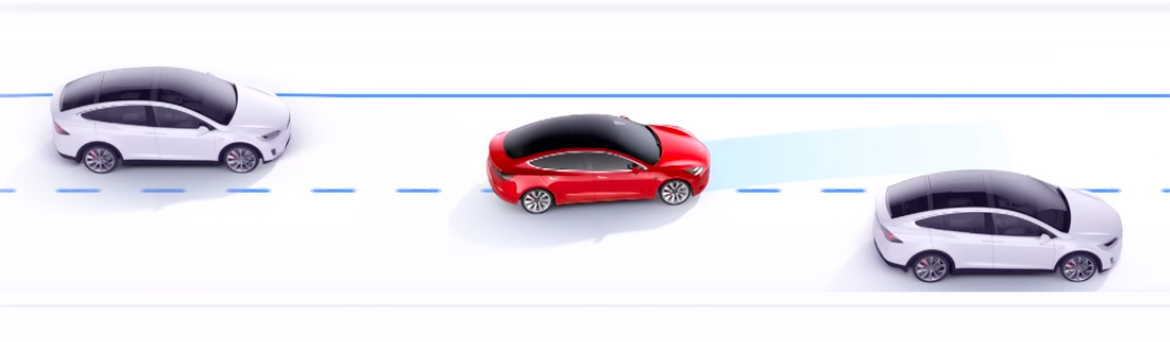

# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load data

In [2]:
car_data = pd.read_csv('/Users/tolumide/action/car_data.csv')
car_data[:5]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Understanding data variables
This will help to understand the importance of each variable and their relevance in the dataset and how to deal with any of the column with missing rows.
* Make - car marker
* Model - car model
* Year - year the car was manufactured 
* Engine Fuel Type - engine fuel type
* Engine HP - engine horse power(HP) i.e the power an engine produces
* Engine Cylinders - engine cylinders
* Transmission Type - transmission type
* Driven_Wheels - driven wheels
* Number of Doors - number of doors in car
* Market Category - category the car fits in
* Vehicle Size - Vehicle Style
* highway MPG - highway speed depending on the gallon of petrol or diesel in its tank
* city mpg - city speed
* Popularity - popularity of the car among twitter users where the data was extracted from
* MSRP - manufacturer suggested retail price 


# Data cleaning
In this section, I wrote a function to display the data types, column name and null values of each column in the dataset using the info() function and how the column names are represented, number of rows, number of duplicated rows using a plotly interactive chart to display missing rows in each column so as to know which section of the dataset needs to be wrangled or manipulated.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

None

There are (11914, 16) rows and column in the dataframe. 

There are 715 duplicate rows in the dataframe 



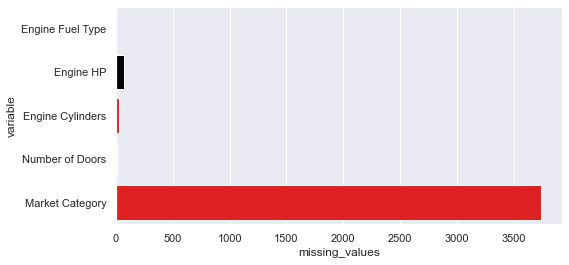

In [9]:
def check_data(data):
    """a function to examine data for cleaning"""
    display(data.info())
    print(f'There are {data.shape} rows and column in the dataframe. \n')
    
    #    duplicate value   
    duplicate = data.duplicated().sum()
    if  duplicate == 0:
        print(f'There are {duplicate} duplicate rows in the dataframe')
    else:
        print(f'There are {duplicate} duplicate rows in the dataframe \n')
        
    #    missing value
        nan_data = pd.DataFrame(data.isna().sum().to_frame().reset_index().rename({'index': 'variable', 0: 'missing_values'}, axis = 1))
        nan_df = nan_data[nan_data['missing_values'] >= 1]
        if nan_df['missing_values'].sum() >= 1:
            plt.figure(figsize=(8, 4))
            sb.barplot(x = 'missing_values', y = 'variable', 
                    data = nan_df, palette = ['red', 'black'])
            
            plt.show()
        else:
            print('No missing value.')

    
check_data(car_data)

# Handling duplicate rows
Check the duplicated rows if they truely exist and drop them but keep the first, why? because duplicate rows are not needed only the unique rows.

In [13]:
def remove_duplicate(data):
    print('\n Duplicate sample:\n')
    display(data[data.duplicated()][:3])
    
    # drop duplicate rows and keep first
    global car_data
    car_data = data.drop_duplicates(keep = 'first')
    print('\n Duplicate data have been removed from the dataset.')

remove_duplicate(car_data)


 Duplicate sample:



,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000



 Duplicate data have been removed from the dataset.


# Handling missing values in rows and column
Dealing with **missing column and rows**, check the data cleaning section above to view and interact with the plotly chart. Before dropping nan(not a number or missing values in a column) we might need to consider or ask questions like, how important is this column with missing rows? can we assume value to this column, using statistical or research method? well in the dataset some missing columns are categorical and some numerical how then can we handle this missing values based on the data concept?

So for some cloumn with few missing values i did a manual variable assignment of value after research, while for market category column with huge number of missing column i assigned a value of **no category** beacause manually filling of those rows is not a recommendable efficient approach to handling missing values and why did i not drop the column is because this might be vital to the predicting model.

### Missing value in **number of doors** column:

Carried out a research on the number of doors each make model with missing value of door have, so as to fill the missing values.

For **Ferrari FF 2013** from this [website](https://en.wikipedia.org/wiki/Ferrari_FF#:~:text=It%20is%20Ferrari's%20first%20production,62%20mph) there are 3 doors and for **Tesla Model S** there are 5 doors, check [here](http://en.wikipedia.org/wiki/Tesla_Model_S).

In [15]:
# showing the missing column
car_data[car_data['Number of Doors'].isna()]

# fill in researched result
car_data.loc[(car_data['Number of Doors'].isna()) & (car_data['Make'] == 'Ferrari'), 'Number of Doors'] = 3
car_data.loc[(car_data['Number of Doors'].isna())  & (car_data['Make'] == 'Tesla'), 'Number of Doors'] = 5

### Missing value in **engine fuel type** column:

Filled missing value of engine fuel type for **Suzuki Verona** as **regular unleaded**, as researched from this [website](http://www.edmunds.com/suzuki/verona/2004/features-specs/)

In [16]:
# showing the missing column
car_data[car_data['Engine Fuel Type'].isna()]

# fill in researched result
car_data.loc[(car_data['Engine Fuel Type'].isna())  & (car_data['Make'] == 'Suzuki'), 'Engine Fuel Type'] = 'Regular unleaded'

### Missing value in **engine cylinders** column:

Researched on **make** and **model** columns with missing engine cylinder value so as to fill.

For **Chevrolet Bolt EV** it is an electric vehicle and does not use an engine cylinder.

**Mazda RX-7** do not have an engine cylinder see [here](https://https://www.motortrend.com/cars/mitsubishi/i-miev/2014/)

**Mazda RX-8** have 4 engine cylinder according to [here](http://www.cardekho.com/mazda/mazda-rx-8-specifications.htm#:~:text=RX%208%20Specs%2C%20Features%20and%20Price&text=It%20is%20available%20with%20Manual,4%20seater%204%20cylinder%20car.)

**Toyota RAV4 EV** have 4 engine cylinder according to [edmunds site](http://www.edmunds.com/toyota/rav4/2012/features-specs/)

**Volkswagen e-Golf** is an electric vehicle and does not use engine cylinder.

**Mitsubishi i-MiEV** no record of number of cylinder according to [here](http://www.motortrend.com/cars/mitsubishi/i-miev/)



In [17]:
# distinct rows with missing value
nan_cylinder = car_data[car_data['Engine Cylinders'].isna()]
print('\n Distinct Make and Model with missing engine cylinders: \n')
display(list(nan_cylinder.groupby(['Make', 'Model']).groups.keys()))

# fill in researched result
car_data.loc[((car_data['Engine Cylinders'].isna())  & (car_data['Make'] == 'Mazda') & (car_data['Model'] == 'RX-8')) |
             ((car_data['Engine Cylinders'].isna())  & (car_data['Make'] == 'Toyota') & (car_data['Model'] == 'RAV4 EV')), 
             'Engine Cylinders'] = 4

car_data.loc[car_data['Engine Cylinders'].isna(), 'Engine Cylinders'] = 0


 Distinct Make and Model with missing engine cylinders: 



[('Chevrolet', 'Bolt EV'),
 ('Mazda', 'RX-7'),
 ('Mazda', 'RX-8'),
 ('Mitsubishi', 'i-MiEV'),
 ('Toyota', 'RAV4 EV'),
 ('Volkswagen', 'e-Golf')]

### Missing value in **engine hp** column:

Research on @google shows that for 

**FIAT 500e** HP is 111,  **Chevrole Impala 2015** is 305, **2016**- 196, **2017**- 197

**Ford Escape** is 180, **Ford Focus** is 160, **Ford Freestar** is 193, **Honda Fit EV** is 123, **Kia Soul EV** is 147, 

**Lincoln Continental** is 305, **Lincoln MKZ** is 245, **Mercedes-Benz M-Class** is 302, **Mitsubishi i-MiEV** HP is 66,

**Nissan Leaf** IS 107, **Tesla Model S 2014** -362 , **2015** - 422 , **2016** - 315, **Toyota RAV4 EV** IS 154

In [18]:
# distinct rows with missing value
nan_cylinder = car_data[car_data['Engine HP'].isna()]
print('\n Distinct Make and Model with missing engine HP: \n')
display(list(nan_cylinder.groupby(['Make', 'Model']).groups.keys()))


# fill in researched result
# chevrolet
car_data.loc[((car_data['Engine HP'].isna())  & (car_data['Make'] == 'Chevrolet') & (car_data['Model'] == 'Impala') 
              & (car_data['Year'] == 2015)), 'Engine HP'] = 305
car_data.loc[((car_data['Engine HP'].isna())  & (car_data['Make'] == 'Chevrolet') & (car_data['Model'] == 'Impala') 
              & (car_data['Year'] == 2016)), 'Engine HP'] = 196
car_data.loc[((car_data['Engine HP'].isna())  & (car_data['Make'] == 'Chevrolet') & (car_data['Model'] == 'Impala') 
              & (car_data['Year'] == 2017)), 'Engine HP'] = 197

# fiat
car_data.loc[(car_data['Engine HP'].isna())  & (car_data['Make'] == 'FIAT') & (car_data['Model'] == '500e'), 'Engine HP'] = 111

# ford
car_data.loc[(car_data['Engine HP'].isna())  & (car_data['Make'] == 'Ford') & (car_data['Model'] == 'Escape'), 'Engine HP'] = 180
car_data.loc[(car_data['Engine HP'].isna())  & (car_data['Make'] == 'Ford') & (car_data['Model'] == 'Focus'), 'Engine HP'] = 160
car_data.loc[(car_data['Engine HP'].isna())  & (car_data['Make'] == 'Ford') & (car_data['Model'] == 'Freestar'), 'Engine HP'] = 193

# honda
car_data.loc[(car_data['Engine HP'].isna())  & (car_data['Make'] == 'Honda') & (car_data['Model'] == 'Fit EV'), 'Engine HP'] = 123

# kia
car_data.loc[(car_data['Engine HP'].isna())  & (car_data['Make'] == 'Kia') & (car_data['Model'] == 'Soul EV'), 'Engine HP'] = 147

# lincoln
car_data.loc[(car_data['Engine HP'].isna())  & (car_data['Make'] == 'Lincoln') & (car_data['Model'] == 'Continental'), 'Engine HP'] = 305
car_data.loc[(car_data['Engine HP'].isna())  & (car_data['Make'] == 'Lincoln') & (car_data['Model'] == 'MKZ'), 'Engine HP'] = 245

# mercedes benz
car_data.loc[(car_data['Engine HP'].isna())  & (car_data['Make'] == 'Mercedes-Benz') & (car_data['Model'] == 'M-Class'), 'Engine HP'] = 302

# mitsubishi
car_data.loc[(car_data['Engine HP'].isna())  & (car_data['Make'] == 'Mitsubishi') & (car_data['Model'] == 'i-MiEV'), 'Engine HP'] = 66

# nissan
car_data.loc[(car_data['Engine HP'].isna())  & (car_data['Make'] == 'Nissan') & (car_data['Model'] == 'Leaf'), 'Engine HP'] = 107

# tesla
car_data.loc[((car_data['Engine HP'].isna())  & (car_data['Make'] == 'Tesla') & (car_data['Model'] == 'Model S') 
             & (car_data['Year'] == 2014)), 'Engine HP'] = 362
car_data.loc[((car_data['Engine HP'].isna())  & (car_data['Make'] == 'Tesla') & (car_data['Model'] == 'Model S')
             & (car_data['Year'] == 2015)), 'Engine HP'] = 422
car_data.loc[((car_data['Engine HP'].isna())  & (car_data['Make'] == 'Tesla') & (car_data['Model'] == 'Model S')
             & (car_data['Year'] == 2016)), 'Engine HP'] = 315

# toyota
car_data.loc[(car_data['Engine HP'].isna())  & (car_data['Make'] == 'Toyota') & (car_data['Model'] == 'RAV4 EV'), 'Engine HP'] = 154


 Distinct Make and Model with missing engine HP: 



[('Chevrolet', 'Impala'),
 ('FIAT', '500e'),
 ('Ford', 'Escape'),
 ('Ford', 'Focus'),
 ('Ford', 'Freestar'),
 ('Honda', 'Fit EV'),
 ('Kia', 'Soul EV'),
 ('Lincoln', 'Continental'),
 ('Lincoln', 'MKZ'),
 ('Mercedes-Benz', 'M-Class'),
 ('Mitsubishi', 'i-MiEV'),
 ('Nissan', 'Leaf'),
 ('Tesla', 'Model S'),
 ('Toyota', 'RAV4 EV')]

### Missing value in **market category** column:

There are 3376 rows missing in maket category column, this number is really huge, a way of filling this is to manually assign a value of no category to all the missing rows. But because there is little prediction this column might suggest to our model, the column will be dropped.

In [19]:
# rows with missing value
car_data = car_data.drop(columns = 'Market Category', axis = 1)

# Detect and handle outliers

Outliers are irregular or abnormal observation samples that are unlike other observation in the dataset. Inorder to prevent this abnormal samples from distorting the statistical analysis, this outliers will have to handled using **interquartile-range (IQR)** approach.

Why is the outlier handled using IQR approach? Interquartile range (IQR = Q3 - Q1) detect outliers and is used on skewed data distribution. Data points that falls below Q1-1.5 * IQR (where Q1 is 25) and above Q3+1.5 * IQR (where Q1 is 75) are categorised as outliers. For this analysis we will be concentrating on the predicting class, which is the price(msrp).


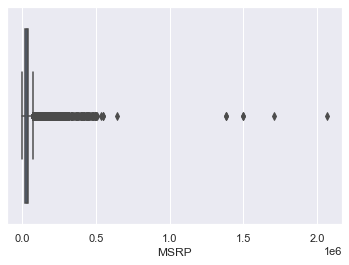

In [20]:
def plot_outlier(data, value):
    """plot outliers in predicting class"""
    sb.boxplot(car_data['MSRP']) 
    plt.show()
    
plot_outlier(car_data, car_data['MSRP'])

In [21]:
# make a copy of the real dataset
new_car_data = car_data.copy()

def remove_outliers(data, column):
    """function to calculate IQR and to remove outliers from the dataset"""
    # to get the IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # get the upper and lower limit
    iqr = Q3 - Q1

    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr 

    # cap number below Q1 and above Q3 as outliers
    data[column] = np.where(data[column] > upper_limit, upper_limit,
                   np.where(data[column] < lower_limit, lower_limit, data[column]))
    return  data

cleaned_car_data = remove_outliers(new_car_data, 'MSRP')

# new dataset
cleaned_car_data.shape

(11199, 15)

Before removing outliers: 



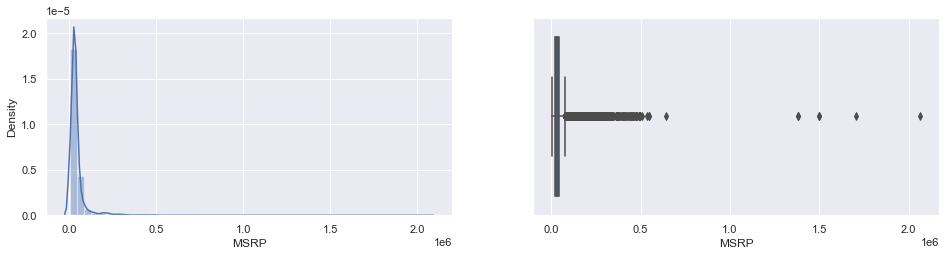

After removing outliers: 



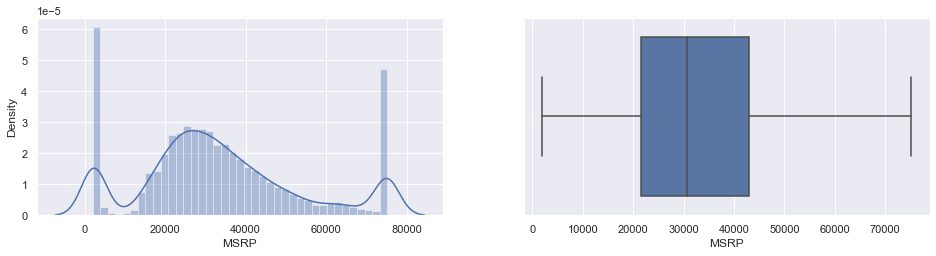

In [23]:
# visualise result before and after removing outliers
print('Before removing outliers: \n')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.distplot(car_data['MSRP'])  # histogragh

plt.subplot(2,2,2)
sb.boxplot(car_data['MSRP'])    #boxplot
plt.show()

print('After removing outliers: \n')
plt.figure(figsize=(16,8))
plt.subplot(2,2,3)
sb.distplot(cleaned_car_data['MSRP'])

plt.subplot(2,2,4)
sb.boxplot(cleaned_car_data['MSRP'])
plt.show()

# Rename and restructure irregularity in column and row
Rename and restructure column, for every variable name with a space between them replace with an underscore and titled case with a lower case.

In [24]:
def rename_column(data):
    """replace space with underscore and titled case to a lower case
    and the values in object column"""
    data.columns = data.columns.str.replace(' ', '_').str.lower()
    
    value_case = list(data.dtypes[data.dtypes == 'object'].index)
    for column in value_case:
        data[column] = data[column].str.lower().str.replace(' ', '_')

    
rename_column(cleaned_car_data)

In [25]:
# view clean data
cleaned_car_data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,26,19,3916,46135.0
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,19,3916,40650.0
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,20,3916,36350.0
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,18,3916,29450.0
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,18,3916,34500.0


# Modeling
In this section, supervised machine learning model (SML) is applied on the dataset. SML algorithm learn from labeled data so as to predict the result of unforseen data, it is divided into regression and classification model. **Regression** is used when there is a relationship between the input and output variables such as weather forecast e.t.c while **Classification** is used when the output variable is categorical such as churn or non-churn, fraud or legit.

Based on the type of data in use and the expected outcome of the analysis, a supervised machine learning regression model is applied on the dataset. Regression model are use to solve regression problems i.e how a dependent variable is affected by the independent variable.

In [30]:
def preprocessing(data, column):
    """one-hot encoding, spliting and scaling of input"""
    data = data.copy()
    
    
    # one-hot encoding
    data = pd.get_dummies(data, drop_first = True)
    
    # split data into train and test set
    dependent = data[column]
    independent = data.drop(column, axis=1)
    
    # train-test split
    from sklearn.model_selection import train_test_split
    independent_train, independent_test, dependent_train, dependent_test = train_test_split(independent, dependent, random_state = 1, 
                        shuffle = True, test_size = 0.2)

    # scale input
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    independent_train = pd.DataFrame(scaler.fit_transform(independent_train), columns = independent_train.columns, 
                                     index = independent_train.index)
    independent_test = pd.DataFrame(scaler.fit_transform(independent_test), columns = independent_test.columns, 
                                    index = independent_test.index)
    
    return independent_train, independent_test, dependent_train, dependent_test

independent_train, independent_test, dependent_train, dependent_test = preprocessing(cleaned_car_data, 'msrp')

ImportError: cannot import name '__check_build' from partially initialized module 'sklearn' (most likely due to a circular import) (/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/__init__.py)

### Dimensionality reduction (DR)

I used DR to reduce features. It's the process of performing feature selection or extraction inorder to find important features that can be use for prediction.

In [90]:
from sklearn.decomposition import PCA
n_components = 120
pca = PCA(n_components = n_components)
# pca.fit(independent_train)

ind_train_pca = pd.DataFrame(pca.fit_transform(independent_train), index = independent_train.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])
ind_test_pca = pd.DataFrame(pca.fit_transform(independent_test), index = independent_test.index, columns=["PC" + str(i) for i in range(1, n_components + 1)])

In [91]:
ind_train_pca.head()

In [92]:
# training model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear regression": LinearRegression(),
    "Linear regression (Ridge)": Ridge(),
    "Linear regression (Lasso)": Lasso(),
    "Random forest": RandomForestRegressor(),
    "Gradient boosting": GradientBoostingRegressor()
}

for item, model in models.items():
    model.fit(independent_train, dependent_train)
    print("Trained",item)

In [93]:
for name, model in models.items():
     print(name + ' ' + 'Rˆ2 Score: {:.3f}'.format(model.score(independent_test, dependent_test)))

Deploy model using flask: (define a set of constraint for the web app to send and receive data) and heroku(allows application running on cloud possible) applications